# Cook County Asset Forfeiture Analysis

By [CJ Ciaramella](mailto:cj.ciaramella@gmail.com)

*Reason Magazine* conducted an analysis of [five years of asset forfeiture data](https://github.com/lucyparsons/1505-documents/tree/master/CCSAO) from the Cook County State's Attorney's Office, collected via a Freedom of Information request by Lucy Parsons Labs. The results [were reported](http://reason.com/blog/2017/06/13/poor-neighborhoods-hit-hardest-by-asset) on June 13, 2017. Here are some of the findings of the analysis, documented below:

- There were roughly 23,0000 asset seizures, with a total estimated value of $105 million, by law enforcement in Cook County between 2012 and 2017.

- Nearly 1,500 of those seizures were for values of $100 or less.

- The most common seized items, besides U.S. currency, were Chevy Impalas.

## How we did it

In [28]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [29]:
# Import and sort forfeitures spreadsheet
forfeitures = pd.read_excel('cook-county-forfeitures.xlsx')
estvalues = forfeitures['EstValue'].dropna()
forfvalues = forfeitures['ForfValue'].dropna()
vins = forfeitures['Vin'].dropna()
ads = forfeitures['AD']
cities = forfeitures['SeizeCity']
descrips = forfeitures['Descr']

estvalue_bins = np.arange(0, 10000, 500)

### Take a peek at the DataFrame

In [30]:
forfeitures.head()

,InventNumb,PolRptNumb,INumber,SeizeDate,SeizeAddress,SeizeCity,SeizeState,SeizeZip,InvItemNumb,Descr,EstValue,Vin,Findings,ForfDate,ForfValue,CaseNumb,AD,ADDate
0,12179595,HX-273066,HX-273066,2014-05-23,5847 S. Justine,Chicago,Il,NaN,1,U.S.C.,205.0,hy-419240,ftot adm,2014-08-25 00:00:00,205.0,14COFO-001771,A,NaN
1,13408901,HY-206119,HY-206119,2015-04-01,3639 W. 62nd St,Chicago,Il,NaN,1,U.S.C.,177500.0,NaN,NaN,NaN,NaN,15COFO-002504,A,NaN
2,13647988,HZ-192027,HZ-192027,2016-03-18,6925 S. Paulina,Chicago,Il,NaN,1,U.S.C.,96.0,NaN,NaN,NaN,NaN,16COFO-001033,D,NaN
3,13689623,HZ-271378,HZ-271378,2016-05-19,"855 N. Leclaire, 2nd fl",Chicago,Il,NaN,1,U.S.C.,428.0,NaN,NaN,NaN,NaN,16COFO-001656,D,NaN
4,13694503,HZ-281003,HZ-281003,2016-05-26,Confidential,Chicago,Il,NaN,1,U.S.C.,2260.0,NaN,NaN,NaN,NaN,NaN,D,NaN


### Get some basic stats from the DataFrame

In [31]:
# total number of seizures 2012-2017
len(forfeitures)

23106

In [32]:
# median estimated value of a seizure
estvalues.median()

1049.0

In [33]:
# mean estimated value
estvalues.mean()

4553.416355517011

In [34]:
# mode of estimated values
estvalues.mode()

0    1000.0
dtype: float64

In [35]:
# total estimated value of all seizures
estvalues.sum()

105024548.23999986

In [36]:
# total forfeited revenue 
forfvalues.sum()

47318608.921000004

In [37]:
# number of forfeitures
forfvalues.count()

12767

In [38]:
# number of seized vehicles
vins.count()

5939

In [39]:
# number of accepted or declined forfeitures
ads.value_counts()

A    20933
D     2122
a        5
Name: AD, dtype: int64

### Now look at the distribution of petty seizures

In [40]:
# sort and count number of seizures below $1000, $500, and $100
under_one_thous = []
under_five_hundo = []
under_one_hundo = []

for value in estvalues:
    if value < 1000:
        under_one_thous.append(value)
    if value < 500:
        under_five_hundo.append(value)
    if value < 100:
        under_one_hundo.append(value)

print("Seizures under $1000 = " + str(len(under_one_thous)) + "\n"
      + "Seizures under $500 = " + str(len(under_five_hundo)) + "\n"
      + "Seizures under $100 = " + str(len(under_one_hundo)))

Seizures under $1000 = 11031
Seizures under $500 = 6154
Seizures under $100 = 1497


### Investigate the values and items further

In [41]:
# most common values seized
estvalues.value_counts().head(10)

1000.0    233
500.0     179
200.0     153
100.0     152
2000.0    133
300.0     118
1500.0    101
3000.0     96
800.0      95
700.0      95
Name: EstValue, dtype: int64

In [42]:
# top 20 most common seizures by description
descrips.value_counts().head(20)

U.S.C.                     16095
2004 Pontiac Grand Prix       24
2006 Chevrolet Impala         23
2004 Chevrolet Impala         22
USC                           22
2002 Ford Explorer            19
2001 Buick Century            19
2008 Chevrolet Impala         17
2000 Chevrolet Impala         17
2003 Ford Explorer            16
1999 Buick Century            16
2007 Chevrolet Impala         16
2002 Chevrolet Impala         16
2011 Chevrolet Malibu         16
2001 Pontiac Grand Prix       15
2003 Ford Taurus              15
2001 Ford Taurus              14
2003 Chevrolet Impala         14
2005 Chevrolet Impala         14
2000 Ford Taurus              14
Name: Descr, dtype: int64

### Break it down by city

In [43]:
# top number of seizures by city
cities.value_counts().head(20)

Chicago            16693
Cook County of       389
Harvey               225
Calumet City         203
Lansing              193
Evanston             173
Cicero               171
Orland Park          169
Forest Park          158
Matteson             154
Berwyn               148
Maywood              138
Bridgeview           136
Bellwood             128
Des Plaines          126
Chicago Heights      122
Dolton               119
Oak Lawn             118
Park Forest          100
Franklin Park         94
Name: SeizeCity, dtype: int64

In [44]:
# group by city and sort by total amount seized
forfeitures.groupby(
    ['SeizeCity']
                   ).EstValue.sum().reset_index().sort_values("EstValue", ascending=False).head(20)

,SeizeCity,EstValue
31,Chicago,73473093.15
49,Cook County of,2392977.26
41,Cicero,1896744.01
162,Oak Lawn,1574290.36
137,McCook,1240751.00
78,Evanston,1153502.37
29,Calumet City,806756.58
204,Schaumburg,774594.85
16,Berwyn,769040.20
174,Orland Park,653054.50


### Make a histogram showing the distribution of seizure values

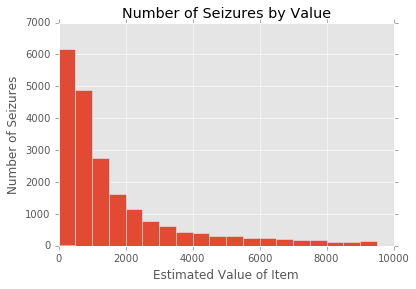

In [45]:
# Plot histogram of estimated values
plt.hist(estvalues, bins = estvalue_bins)
plt.xlabel('Estimated Value of Item')
plt.ylabel('Number of Seizures')
plt.title('Number of Seizures by Value')
plt.grid(True)

In [46]:
plt.show()